In [1]:
import os
os.environ['MATPLOTLIBRC'] = "../matplotlibrc" 
import sys
from tg_analysis import get_tg_data
import signac
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
BSU_BLUE = "#0033A0"
BSU_ORANGE = "#D64309"

data_path_small = '/home/mikehenry/small_tg_test/epoxpy-flow'
data_path_large = '/home/sthomas/projects/LB_mixing/'


print("building small df")
project = signac.get_project(data_path_small)
df_index = pd.DataFrame(project.index())
df_index = df_index.set_index(["_id"])
statepoints = {doc["_id"]: doc["statepoint"] for doc in project.index()}
df_S = pd.DataFrame(statepoints).T.join(df_index)
df_S = df_S.sort_values("T")
print("done")
print("building large df")
project = signac.get_project(data_path_large)
df_index = pd.DataFrame(project.index())
df_index = df_index.set_index(["_id"])
statepoints = {doc["_id"]: doc["statepoint"] for doc in project.index()}
df_L = pd.DataFrame(statepoints).T.join(df_index)
df_L = df_L.sort_values("T")
print("done")

building small df
done
building large df
done


In [3]:
alphas_S, fit_ydata_S, R2_S, cure_percents_S, Tgs_S = get_tg_data(data_path_small, df_S)
print("done")
alphas_L, fit_ydata_L, R2_L, cure_percents_L, Tgs_L = get_tg_data(data_path_large, df_L)


1
2
0
0
1
2
0
0
2
2
1
1
0
2
1
2
0
1
1
0
2
1
2
0
2
0
1
1
2
0
0
2
1
2
1
0
2
1
2
1
0
0
1
2
2
0
0
1
0
1
2
2
1
0
2
0
1
0
2
1
1
0
2
0
2
1
2
0
1
1
2
0
2
1
0
2
0
1
1
0
2
1
2
0
2
1
0
0
2
1
1
0
2
0
2
1
0
2
1
1
2
0
0
2
1
1
2
0
2
0
1
0
2
1
in common, indices: (array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  20,  25,  26,  27,  29,  30,  31,  33,
        34,  36,  37,  39,  40,  42,  43,  44,  45,  46,  47,  48,  49,
        50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,
        63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,
        76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,
        89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101,
       102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113]),)
00 0
I am here
2
0
1
1
2
0
1
0
2
1
0
2
2
0
1
1
0
2
2
1
0
2
0
1
2
2
1
1
0
0
1
1
0
0
2
2
1
1
2
2
0
0
0
2
1
2
1
0
0
1
1
2
0
2
2
0
1
1
2
0
1
2
0
0
2
1
0
2
1
1
2
0
1
0
2
0
1
2
0
1
2


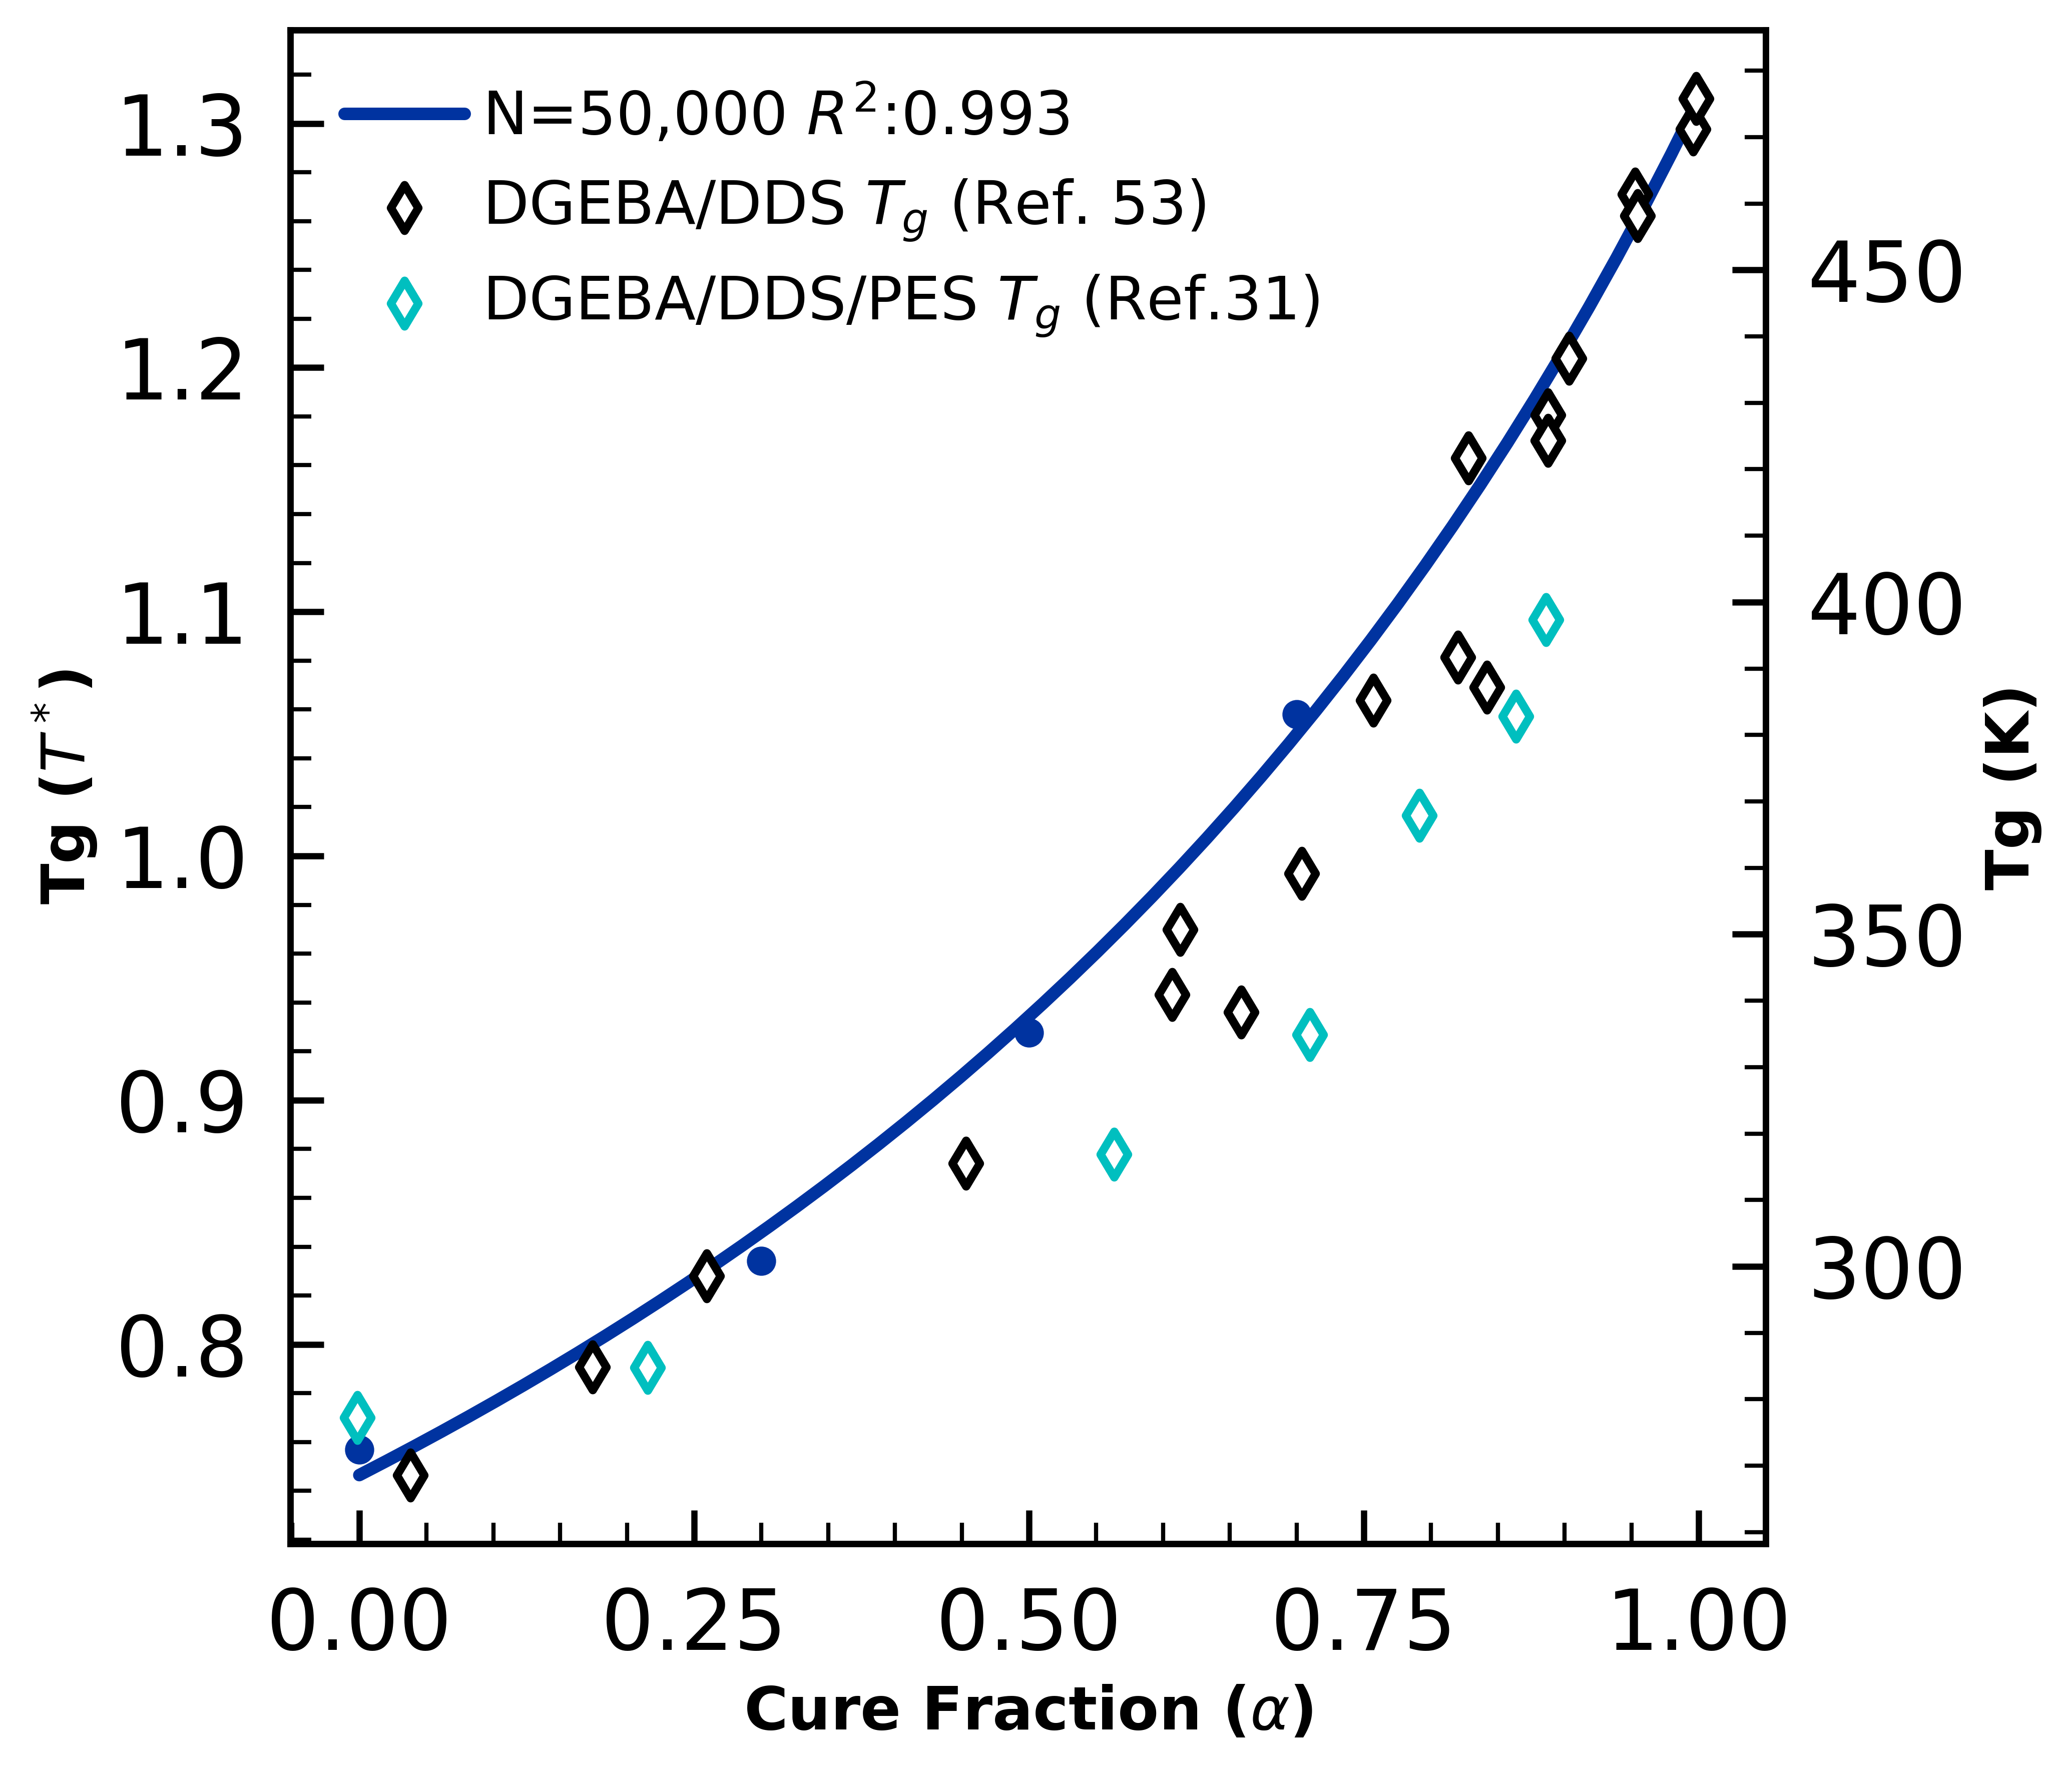

In [15]:
fig, ax1 = plt.subplots(dpi=600, figsize=(7, 6))
ax2=ax1.twinx()

#ax1.scatter(cure_percents_S/100., Tgs_S, color='r')
ax1.scatter(cure_percents_L/100., Tgs_L, color=BSU_BLUE)
#ax1.plot(alphas_S,fit_ydata_S,label='N=500 $R^2$:{}'.format(round(R2_S,3)), color="r")
ax1.plot(alphas_L,fit_ydata_L,label='N=50,000 $R^2$:{}'.format(round(R2_L,3)), color=BSU_BLUE)

exp1_data = np.genfromtxt('Min1993.txt',delimiter=',')

ax2.scatter(exp1_data[:,0],
                exp1_data[:,1],
                marker='d',
                facecolor='w',
                linewidth=2,
                edgecolor='k',
                s=60,
                #label='$E_a$:{}'.format(activation_energy),
                color='k',
               zorder=1,
               label='DGEBA/DDS $T_g$ (Ref. 53)')


exp2_data = np.genfromtxt('Jenninger2000.txt',delimiter=',')
ax2.scatter(exp2_data[:,0],
                exp2_data[:,1],
                marker='d',
                facecolor='w',
                linewidth=2,
                edgecolor='c',
                s=60,
                #label='$E_a$:{}'.format(activation_energy),
                color='c',
               zorder=1,
               label='DGEBA/DDS/PES $T_g$ (Ref.31)')




#ax2.scatter(1.00,Tg_exp,marker='*',color='r',s=200,label='Experimental Tg ($\\alpha=1.0$)')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc=2)
ax1.set_xlabel('Cure Fraction ($\\alpha$)')
ax1.set_ylabel('Tg ($T^*$)')
ax2.set_ylabel('Tg (K)')
plt.savefig("Tg_N_exp.png", transparent=True)
#ax1.legend(fontsize=10,loc='best')
#ax2.legend(fontsize=10,loc='center left')


In [5]:
#plt.style.use('matplotlibrc')
fig, ax1 = plt.subplots(dpi=600, figsize=(7, 6))

ax1.scatter(cure_percents_S/100., Tgs_S, color=BSU_ORANGE)
ax1.scatter(cure_percents_L/100., Tgs_L, color=BSU_BLUE)
ax1.plot(alphas_S,fit_ydata_S,label='N=500 $R^2$:{}'.format(round(R2_S,3)), color=BSU_ORANGE)
ax1.plot(alphas_L,fit_ydata_L,label='N=50,000 $R^2$:{}'.format(round(R2_L,3)), color=BSU_BLUE)



#ax2.scatter(1.00,Tg_exp,marker='*',color='r',s=200,label='Experimental Tg ($\\alpha=1.0$)')

ax1.legend()
ax1.set_xlabel('Cure Fraction ($\\alpha$)')
ax1.set_ylabel('Tg ($T^*$)')
plt.savefig("Tg_N_sim.png", transparent=True)
#ax1.legend(fontsize=10,loc='best')
#ax2.legend(fontsize=10,loc='center left')


In [6]:
cure_percents_S

array([ 0.25, 30.  , 50.  , 70.  ])

In [7]:
Tgs_S

array([0.74407287, 0.8259245 , 0.86581913, 1.03453622])

In [8]:
cure_percents_S

array([ 0.25, 30.  , 50.  , 70.  ])

In [9]:
Tgs_S

array([0.74407287, 0.8259245 , 0.86581913, 1.03453622])

In [10]:
data_path_small

'/home/mikehenry/small_tg_test/epoxpy-flow'

In [11]:
df_S

CC_bond_dist AB_interaction num_c10  \
78a4cdb05be28b12ac86ecd17fed1bd5            1       0.886702       2   
bd8ae3b370240708ed63acf3363baaac            1       0.886702       2   
fe4df1a9e5c28c7b366efac6ffb6f2ac            1       0.886702       2   
e8707d04db0d67ffeaeff951bd41f4bd            1       0.886702       2   
c385c06137eaf1cd6af84ae51fd779fc            1       0.886702       2   
...                                       ...            ...     ...   
af7e9111a778caf8750f9ecbb0509ded            1       0.886702       2   
ba346228f5f3d31df013f90cb38b7aba            1       0.886702       2   
38d6a8a63ee02956f17b9968f37b831a            1       0.886702       2   
52a11aa993407e17483a20fa3a7ceaad            1       0.886702       2   
8134207a75fb0553ac38720b422bdd42            1       0.886702       2   

                                 CC_bond_angle_const AB_bond_dist  \
78a4cdb05be28b12ac86ecd17fed1bd5                None            1   
bd8ae3b370240708ed63acf3363baaac                None            1   
fe4df1a9e5c28c7b366efac6ffb6f2ac                None            1   
e8707d04db0d67ffeaeff951bd41f4bd                None            1   
c385c06137eaf1cd6af84ae51fd779fc                None            1   
...                                              ...          ...   
af7e9111a778caf8750f9ecbb0509ded                None            1   
ba346228f5f3d31df013f90cb38b7aba                None            1   
38d6a8a63ee02956f17b9968f37b831a                None            1   
52a11aa993407e17483a20fa3a7ceaad                None            1   
8134207a75fb0553ac38720b422bdd42                None            1   

                                 CC_bond_angle  bond profile AB_bond_const  \
78a4cdb05be28b12ac86ecd17fed1bd5          None  True     iso           100   
bd8ae3b370240708ed63acf3363baaac          None  True     iso           100   
fe4df1a9e5c28c7b366efac6ffb6f2ac          None  True     iso           100   
e8707d04db0d67ffeaeff951bd41f4bd          None  True     iso           100   
c385c06137eaf1cd6af84ae51fd779fc          None  True     iso           100   
...                                        ...   ...     ...           ...   
af7e9111a778caf8750f9ecbb0509ded          None  True     iso           100   
ba346228f5f3d31df013f90cb38b7aba          None  True     iso           100   
38d6a8a63ee02956f17b9968f37b831a          None  True     iso           100   
52a11aa993407e17483a20fa3a7ceaad          None  True     iso           100   
8134207a75fb0553ac38720b422bdd42          None  True     iso           100   

                                         sim_name  ...  \
78a4cdb05be28b12ac86ecd17fed1bd5  blend_iso_1.0kT  ...   
bd8ae3b370240708ed63acf3363baaac  blend_iso_1.0kT  ...   
fe4df1a9e5c28c7b366efac6ffb6f2ac  blend_iso_1.0kT  ...   
e8707d04db0d67ffeaeff951bd41f4bd  blend_iso_1.0kT  ...   
c385c06137eaf1cd6af84ae51fd779fc  blend_iso_1.0kT  ...   
...                                           ...  ...   
af7e9111a778caf8750f9ecbb0509ded  blend_iso_3.5kT  ...   
ba346228f5f3d31df013f90cb38b7aba  blend_iso_3.5kT  ...   
38d6a8a63ee02956f17b9968f37b831a  blend_iso_3.5kT  ...   
52a11aa993407e17483a20fa3a7ceaad  blend_iso_3.5kT  ...   
8134207a75fb0553ac38720b422bdd42  blend_iso_3.5kT  ...   

                                                                             status  \
78a4cdb05be28b12ac86ecd17fed1bd5  {'78a4cdb05be28b12ac86ecd17fed1bd5-process': 1...   
bd8ae3b370240708ed63acf3363baaac  {'bd8ae3b370240708ed63acf3363baaac-process': 1...   
fe4df1a9e5c28c7b366efac6ffb6f2ac  {'fe4df1a9e5c28c7b366efac6ffb6f2ac-process': 1...   
e8707d04db0d67ffeaeff951bd41f4bd  {'e8707d04db0d67ffeaeff951bd41f4bd-process': 1...   
c385c06137eaf1cd6af84ae51fd779fc  {'c385c06137eaf1cd6af84ae51fd779fc-post_proces...   
...                                                                             ...   
af7e9111a778caf8750f9ecbb0509ded  {'af7e9111a778caf8750f9ecbb0509ded-process': 1...   
ba346228f

In [12]:
    df_filtered = df_S[
        (df_S.quench_T <= 3.0)
        & (df_S.quench_T >= 0.1)
        & (df_S.CC_bond_angle != 109.5)
        & (df_S.cooling_method == "quench")
    ]

In [13]:

df_curing = df_filtered[
    (df_filtered.bond == False)
    & (df_filtered.calibrationT == 305)
    & (df_filtered.cooling_method == "quench")
    & (df_filtered.stop_after_percent == 70.0)
]

In [14]:
df_curing

CC_bond_dist AB_interaction num_c10  \
46bfa225606dfaf21c13d0c07a54ffd3            1       0.886702       2   
4fd2d407550a50fe8522f1c2c07a89a4            1       0.886702       2   
beefa41e5eda5a35620e71007f6153f1            1       0.886702       2   
9e24e93ae50b0e2ceb778c6c06d5923f            1       0.886702       2   
d446259700941a4335aaa882a7ecb698            1       0.886702       2   
...                                       ...            ...     ...   
4a3aae23b2c6431ed2100664250d1aa9            1       0.886702       2   
f60ed3cedec6bb194154d8a4f5d287d2            1       0.886702       2   
de3145c90d1da4abc0b7899b89bbe400            1       0.886702       2   
1bf23b857f415509c29fac115172b5b8            1       0.886702       2   
717628b1fa0fa843df4814d5be677ffa            1       0.886702       2   

                                 CC_bond_angle_const AB_bond_dist  \
46bfa225606dfaf21c13d0c07a54ffd3                None            1   
4fd2d407550a50fe8522f1c2c07a89a4                None            1   
beefa41e5eda5a35620e71007f6153f1                None            1   
9e24e93ae50b0e2ceb778c6c06d5923f                None            1   
d446259700941a4335aaa882a7ecb698                None            1   
...                                              ...          ...   
4a3aae23b2c6431ed2100664250d1aa9                None            1   
f60ed3cedec6bb194154d8a4f5d287d2                None            1   
de3145c90d1da4abc0b7899b89bbe400                None            1   
1bf23b857f415509c29fac115172b5b8                None            1   
717628b1fa0fa843df4814d5be677ffa                None            1   

                                 CC_bond_angle   bond profile AB_bond_const  \
46bfa225606dfaf21c13d0c07a54ffd3          None  False     iso           100   
4fd2d407550a50fe8522f1c2c07a89a4          None  False     iso           100   
beefa41e5eda5a35620e71007f6153f1          None  False     iso           100   
9e24e93ae50b0e2ceb778c6c06d5923f          None  False     iso           100   
d446259700941a4335aaa882a7ecb698          None  False     iso           100   
...                                        ...    ...     ...           ...   
4a3aae23b2c6431ed2100664250d1aa9          None  False     iso           100   
f60ed3cedec6bb194154d8a4f5d287d2          None  False     iso           100   
de3145c90d1da4abc0b7899b89bbe400          None  False     iso           100   
1bf23b857f415509c29fac115172b5b8          None  False     iso           100   
717628b1fa0fa843df4814d5be677ffa          None  False     iso           100   

                                         sim_name  ...  \
46bfa225606dfaf21c13d0c07a54ffd3  blend_iso_3.0kT  ...   
4fd2d407550a50fe8522f1c2c07a89a4  blend_iso_3.0kT  ...   
beefa41e5eda5a35620e71007f6153f1  blend_iso_3.0kT  ...   
9e24e93ae50b0e2ceb778c6c06d5923f  blend_iso_3.0kT  ...   
d446259700941a4335aaa882a7ecb698  blend_iso_3.0kT  ...   
...                                           ...  ...   
4a3aae23b2c6431ed2100664250d1aa9  blend_iso_3.0kT  ...   
f60ed3cedec6bb194154d8a4f5d287d2  blend_iso_3.0kT  ...   
de3145c90d1da4abc0b7899b89bbe400  blend_iso_3.0kT  ...   
1bf23b857f415509c29fac115172b5b8  blend_iso_3.0kT  ...   
717628b1fa0fa843df4814d5be677ffa  blend_iso_3.0kT  ...   

                                                                             status  \
46bfa225606dfaf21c13d0c07a54ffd3  {'46bfa225606dfaf21c13d0c07a54ffd3-process': 4...   
4fd2d407550a50fe8522f1c2c07a89a4  {'4fd2d407550a50fe8522f1c2c07a89a4-prep': 4, '...   
beefa41e5eda5a35620e71007f6153f1  {'beefa41e5eda5a35620e71007f6153f1-process': 4...   
9e24e93ae50b0e2ceb778c6c06d5923f  {'9e24e93ae50b0e2ceb778c6c06d5923f-post_proces...   
d446259700941a4335aaa882a7ecb698  {'d446259700941a4335aaa882a7ecb698-post_proces...   
...                                                                             ...   
4a3aae23b2c6431ed2100664250d1aa9  {'4a3aae23b2c6431ed2100664250d1aa9-prep': 1, '... 